***Importing Necessary Libraries***

---



In [365]:
import pandas as pd
import numpy as np
import seaborn as sns

In [366]:
# Visualization
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
colors = px.colors.sequential.Plasma_r

In [367]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [368]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [369]:
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

In [370]:
# Warnings
import warnings
warnings. filterwarnings('ignore')

In [371]:
heart = pd.read_csv('C:/Users/krish/Desktop/salo/ML/ML&SM dataset.csv')

**Understanding the Data**

---



In [372]:
heart.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [373]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [374]:
heart.shape

(308854, 19)

In [375]:
heart = heart.drop_duplicates()

In [376]:
heart.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [377]:
# checking for typos in the categorical columns
for col in heart.select_dtypes(include = "object"):
    print(f"Column name: {col}")
    print(heart[col].unique())
    print('\n', '-'*80, '\n')


Column name: General_Health
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

 -------------------------------------------------------------------------------- 

Column name: Checkup
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

 -------------------------------------------------------------------------------- 

Column name: Exercise
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Heart_Disease
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Skin_Cancer
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Other_Cancer
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Depression
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name:

In [378]:
heart['Checkup'] = heart['Checkup'].replace('Within the past 2 years', 'Past 2 years')
heart['Checkup'] = heart['Checkup'].replace('Within the past year', 'Past 1 year')
heart['Checkup'] = heart['Checkup'].replace('Within the past 5 years', 'Past 5 years')
heart['Checkup'] = heart['Checkup'].replace('5 or more years ago', 'More than 5 years')


heart['Diabetes'] = heart['Diabetes'].replace('No, pre-diabetes or borderline diabetes', 'No Pre Diabetes')
heart['Diabetes'] = heart['Diabetes'].replace('Yes, but female told only during pregnancy', 'Only during pregnancy')

heart['Age_Category'] = heart['Age_Category'].replace('18-24', 'Young')
heart['Age_Category'] = heart['Age_Category'].replace('25-29', 'Adult')
heart['Age_Category'] = heart['Age_Category'].replace('30-34', 'Adult')
heart['Age_Category'] = heart['Age_Category'].replace('35-39', 'Adult')
heart['Age_Category'] = heart['Age_Category'].replace('40-44', 'Mid-Aged')
heart['Age_Category'] = heart['Age_Category'].replace('45-49', 'Mid-Aged')
heart['Age_Category'] = heart['Age_Category'].replace('50-54', 'Mid-Aged')
heart['Age_Category'] = heart['Age_Category'].replace('55-59', 'Senior-Adult')
heart['Age_Category'] = heart['Age_Category'].replace('60-64', 'Senior-Adult')
heart['Age_Category'] = heart['Age_Category'].replace('65-69', 'Elderly')
heart['Age_Category'] = heart['Age_Category'].replace('70-74', 'Elderly')
heart['Age_Category'] = heart['Age_Category'].replace('75-79', 'Elderly')
heart['Age_Category'] = heart['Age_Category'].replace('80+', 'Elderly')

In [379]:
heart

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Past 2 years,No,No,No,No,No,No,Yes,Female,Elderly,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Past 1 year,No,Yes,No,No,No,Yes,No,Female,Elderly,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Past 1 year,Yes,No,No,No,No,Yes,No,Female,Senior-Adult,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Past 1 year,Yes,Yes,No,No,No,Yes,No,Male,Elderly,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Past 1 year,No,No,No,No,No,No,No,Male,Elderly,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Past 1 year,Yes,No,No,No,No,No,No,Male,Adult,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Past 5 years,Yes,No,No,No,No,Yes,No,Male,Elderly,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,More than 5 years,Yes,No,No,No,Yes,Only during pregnancy,No,Female,Adult,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Past 1 year,Yes,No,No,No,No,No,No,Male,Elderly,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


**Descriptive Analaysis**

---



In [381]:
heart.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [382]:
heart.describe(include = 'O')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308774,308774,308774,308774,308774,308774,308774,308774,308774,308774,308774,308774
unique,5,5,2,2,2,2,2,4,2,2,5,2
top,Very Good,Past 1 year,Yes,No,No,No,No,No,No,Female,Elderly,No
freq,110351,239295,239305,283803,278782,278897,246875,259062,207711,160155,107492,183516


In [383]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308774.0,170.615220,10.658452,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308774.0,83.590399,21.344664,24.95,68.04,81.65,95.25,293.02
BMI,308774.0,28.626813,6.522810,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308774.0,5.097557,8.200434,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308774.0,29.834290,24.877812,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308774.0,15.109517,14.926912,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308774.0,6.297237,8.583837,0.00,2.00,4.00,8.00,128.00


** Data Preprocessing**

---



In [384]:
X = heart.iloc[:, [0, 1, 10]]

In [385]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,heart.iloc[:,3], test_size = 0.2) 

In [386]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['Poor', 'Fair','Good', 'Very Good', 'Excellent'],['Never', 'More than 5 years','Past 5 years', 'Past 2 years', 'Past 1 year'], ['Young', 'Adult', 'Mid-Aged', 'Senior-Adult', 'Elderly'] ])

In [387]:
X_encoded = oe.fit_transform(X)

In [388]:
X_encoded.shape

(308774, 3)

In [389]:
X_encoded

array([[0., 3., 4.],
       [3., 4., 4.],
       [3., 4., 3.],
       ...,
       [3., 1., 1.],
       [3., 4., 4.],
       [4., 4., 2.]])

In [390]:
oe.categories_

[array(['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], dtype=object),
 array(['Never', 'More than 5 years', 'Past 5 years', 'Past 2 years',
        'Past 1 year'], dtype=object),
 array(['Young', 'Adult', 'Mid-Aged', 'Senior-Adult', 'Elderly'],
       dtype=object)]

In [391]:
heart

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Past 2 years,No,No,No,No,No,No,Yes,Female,Elderly,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Past 1 year,No,Yes,No,No,No,Yes,No,Female,Elderly,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Past 1 year,Yes,No,No,No,No,Yes,No,Female,Senior-Adult,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Past 1 year,Yes,Yes,No,No,No,Yes,No,Male,Elderly,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Past 1 year,No,No,No,No,No,No,No,Male,Elderly,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Past 1 year,Yes,No,No,No,No,No,No,Male,Adult,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Past 5 years,Yes,No,No,No,No,Yes,No,Male,Elderly,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,More than 5 years,Yes,No,No,No,Yes,Only during pregnancy,No,Female,Adult,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Past 1 year,Yes,No,No,No,No,No,No,Male,Elderly,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [392]:
heart['General_Health'] = X_encoded[:, 0]
heart['Checkup'] = X_encoded[:, 1]
heart['Age_Category'] = X_encoded[:, 2]

In [393]:
heart

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,3.0,No,No,No,No,No,No,Yes,Female,4.0,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,3.0,4.0,No,Yes,No,No,No,Yes,No,Female,4.0,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,3.0,4.0,Yes,No,No,No,No,Yes,No,Female,3.0,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,0.0,4.0,Yes,Yes,No,No,No,Yes,No,Male,4.0,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,2.0,4.0,No,No,No,No,No,No,No,Male,4.0,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3.0,4.0,Yes,No,No,No,No,No,No,Male,1.0,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,1.0,2.0,Yes,No,No,No,No,Yes,No,Male,4.0,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,3.0,1.0,Yes,No,No,No,Yes,Only during pregnancy,No,Female,1.0,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,3.0,4.0,Yes,No,No,No,No,No,No,Male,4.0,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [394]:
o = heart.loc[:, ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']]

In [395]:
h = pd.get_dummies(o)

In [396]:
h = h.astype(int)

In [397]:
h

,Exercise_No,Exercise_Yes,Heart_Disease_No,Heart_Disease_Yes,Skin_Cancer_No,Skin_Cancer_Yes,Other_Cancer_No,Other_Cancer_Yes,Depression_No,Depression_Yes,Arthritis_No,Arthritis_Yes,Smoking_History_No,Smoking_History_Yes
0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
2,0,1,1,0,1,0,1,0,1,0,1,0,1,0
3,0,1,0,1,1,0,1,0,1,0,1,0,1,0
4,1,0,1,0,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,0,1,1,0,1,0,1,0,1,0,1,0,1,0
308850,0,1,1,0,1,0,1,0,1,0,1,0,1,0
308851,0,1,1,0,1,0,1,0,0,1,1,0,0,1
308852,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [398]:
encoded_df = pd.DataFrame(h, columns=['Exercise_No', 'Exercise_Yes', 'Heart_Disease_No', 'Heart_Disease_Yes', 'Skin_Cancer_No', 'Skin_Cancer_Yes', 'Other_Cancer_No', 'Other_Cancer_Yes', 'Depression_No', 'Depression_Yes', 'Arthritis_No', 'Arthritis_Yes', 'Smoking_History_No', 'Smoking_History_Yes'])
heart_encoded = pd.concat([heart, encoded_df], axis=1)

heart_encoded.drop(columns=['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History'], inplace=True)
heart_encoded

,General_Health,Checkup,Diabetes,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,...,Skin_Cancer_No,Skin_Cancer_Yes,Other_Cancer_No,Other_Cancer_Yes,Depression_No,Depression_Yes,Arthritis_No,Arthritis_Yes,Smoking_History_No,Smoking_History_Yes
0,0.0,3.0,No,Female,4.0,150.0,32.66,14.54,0.0,30.0,...,1,0,1,0,1,0,0,1,0,1
1,3.0,4.0,Yes,Female,4.0,165.0,77.11,28.29,0.0,30.0,...,1,0,1,0,1,0,1,0,1,0
2,3.0,4.0,Yes,Female,3.0,163.0,88.45,33.47,4.0,12.0,...,1,0,1,0,1,0,1,0,1,0
3,0.0,4.0,Yes,Male,4.0,180.0,93.44,28.73,0.0,30.0,...,1,0,1,0,1,0,1,0,1,0
4,2.0,4.0,No,Male,4.0,191.0,88.45,24.37,0.0,8.0,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3.0,4.0,No,Male,1.0,168.0,81.65,29.05,4.0,30.0,...,1,0,1,0,1,0,1,0,1,0
308850,1.0,2.0,Yes,Male,4.0,180.0,69.85,21.48,8.0,15.0,...,1,0,1,0,1,0,1,0,1,0
308851,3.0,1.0,Only during pregnancy,Female,1.0,157.0,61.23,24.69,4.0,40.0,...,1,0,1,0,0,1,1,0,0,1
308852,3.0,4.0,No,Male,4.0,183.0,79.38,23.73,3.0,30.0,...,1,0,1,0,1,0,1,0,1,0


In [399]:
heart_encoded = heart_encoded.drop(columns=['Exercise_No', 'Heart_Disease_No', 'Skin_Cancer_No', 'Other_Cancer_No', 'Depression_No', 'Arthritis_No', 'Smoking_History_No'])

In [400]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

heart_encoded['Sex'] = label_encoder.fit_transform(heart_encoded['Sex'])
heart_encoded['Diabetes'] = label_encoder.fit_transform(heart_encoded['Diabetes'])
unique_labels = label_encoder.classes_
print("Unique labels:", unique_labels)

Unique labels: ['No' 'No Pre Diabetes' 'Only during pregnancy' 'Yes']


In [401]:
heart_encoded.columns

Index(['General_Health', 'Checkup', 'Diabetes', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes',
       'Arthritis_Yes', 'Smoking_History_Yes'],
      dtype='object')

In [402]:
heart_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308774 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  float64
 1   Checkup                       308774 non-null  float64
 2   Diabetes                      308774 non-null  int32  
 3   Sex                           308774 non-null  int32  
 4   Age_Category                  308774 non-null  float64
 5   Height_(cm)                   308774 non-null  float64
 6   Weight_(kg)                   308774 non-null  float64
 7   BMI                           308774 non-null  float64
 8   Alcohol_Consumption           308774 non-null  float64
 9   Fruit_Consumption             308774 non-null  float64
 10  Green_Vegetables_Consumption  308774 non-null  float64
 11  FriedPotato_Consumption       308774 non-null  float64
 12  Exercise_Yes                  308774 non-null  in

In [403]:
correlation_matrix = heart_encoded.corr
print(correlation_matrix)

<bound method DataFrame.corr of         General_Health  Checkup  Diabetes  Sex  Age_Category  Height_(cm)  \
0                  0.0      3.0         0    0           4.0        150.0   
1                  3.0      4.0         3    0           4.0        165.0   
2                  3.0      4.0         3    0           3.0        163.0   
3                  0.0      4.0         3    1           4.0        180.0   
4                  2.0      4.0         0    1           4.0        191.0   
...                ...      ...       ...  ...           ...          ...   
308849             3.0      4.0         0    1           1.0        168.0   
308850             1.0      2.0         3    1           4.0        180.0   
308851             3.0      1.0         2    0           1.0        157.0   
308852             3.0      4.0         0    1           4.0        183.0   
308853             4.0      4.0         0    0           2.0        160.0   

        Weight_(kg)    BMI  Alcohol_Consump

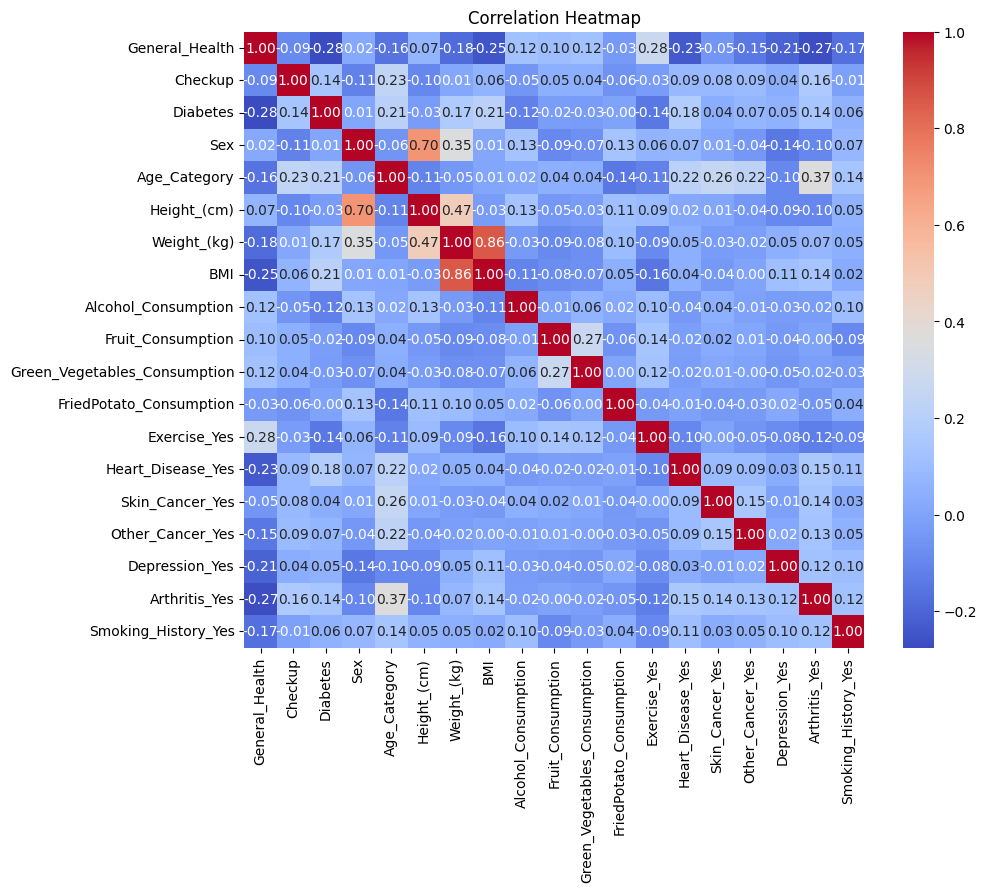

In [404]:
import seaborn as sns
cor = heart_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [405]:
heart_encoded = heart_encoded.drop(columns=['Weight_(kg)', 'Height_(cm)', 'BMI'])

In [406]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is a DataFrame containing the features you listed
# Extract features from the DataFrame
columns_to_include = ['General_Health', 'Checkup', 'Diabetes', 'Sex', 'Age_Category',
                      'Alcohol_Consumption',
                      'Fruit_Consumption', 'Green_Vegetables_Consumption',
                      'FriedPotato_Consumption', 'Exercise_Yes', 'Heart_Disease_Yes',
                      'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes',
                      'Arthritis_Yes', 'Smoking_History_Yes']
features = heart_encoded.loc[:, columns_to_include]

numeric_features = features.select_dtypes(include=['float64', 'int64'])

# Extract features from the DataFrame
X1 = numeric_features.values

# Standardize the features
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Apply PCA
pca = PCA(n_components=0.95)  # You can specify the variance to be explained
X1_pca = pca.fit_transform(X1_scaled)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the number of principal components retained
print("Number of principal components:", pca.n_components_)

# Now X_pca contains the transformed features with reduced dimensionality


Explained variance ratio: [0.19766224 0.19522917 0.14614444 0.14038953 0.11953225 0.10202823
 0.09901414]
Number of principal components: 7


In [407]:
X1_pca.shape

(308774, 7)

In [408]:
X = X1_pca  # Features
y = heart_encoded['Heart_Disease_Yes']  # Target variable

In [409]:
y.shape

(308774,)

In [410]:
smote = SMOTE(random_state=2)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [411]:
# splitting the data into training and testing sets for diabetes balanced
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=2)

In [412]:
# feature scaling on diabetes
scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X_train)
X_test_scaled = scaler_d.transform(X_test)

**Model Building**

---



In [413]:
# Create the model
lr_d = LogisticRegression()
lr_d.fit(X_train_scaled, y_train)

LogisticRegression()

In [414]:
y_pred = lr_d.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71     56436
           1       0.71      0.81      0.76     57086

    accuracy                           0.74    113522
   macro avg       0.74      0.74      0.74    113522
weighted avg       0.74      0.74      0.74    113522



In [419]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [415]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7366149292648121
Precision: 0.7084368387156132
Recall: 0.8093052587324387
F1 Score: 0.7555192150449714
Confusion Matrix:
[[37422 19014]
 [10886 46200]]


**Model Evaluation**

---



In [416]:
def plot_classification_report(report, title):
    lines = report.split('\n')[2:-5]
    classes = []
    precision = []
    recall = []
    f1_score = []
    support = []
    for line in lines:
        row_data = line.split()
        classes.append(row_data[0])
        precision.append(float(row_data[1]))
        recall.append(float(row_data[2]))
        f1_score.append(float(row_data[3]))
        support.append(int(row_data[4]))

    fig = go.Figure()
    fig.add_trace(go.Bar(x=classes, y=precision, name='Precision', marker_color = colors[0]))
    fig.add_trace(go.Bar(x=classes, y=recall, name='Recall', marker_color = colors[1]))
    fig.add_trace(go.Bar(x=classes, y=f1_score, name='F1-Score', marker_color = colors[2]))

    fig.update_layout(title=title, xaxis_title='Class', yaxis_title='Score', barmode='group', xaxis={'categoryorder': 'total descending'}, plot_bgcolor='white')

    fig.show()

In [417]:
# Classification reports for different algorithms

lr_d_report = classification_report(y_test, y_pred)

In [418]:
# Plot classification reports

print("="*40, "Logistic regression report:", "="*45, '\n')
print(lr_d_report)
plot_classification_report(lr_d_report, "Logistic Regression Classification Report Visualization")

======================================== Logistic regression report: ============================================= 

              precision    recall  f1-score   support

           0       0.77      0.66      0.71     56436
           1       0.71      0.81      0.76     57086

    accuracy                           0.74    113522
   macro avg       0.74      0.74      0.74    113522
weighted avg       0.74      0.74      0.74    113522

